In [10]:

import requests
from bs4 import BeautifulSoup 
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
ticker = "AAPL"
url = "https://financialmodelingprep.com/financial-summary/" + ticker
request = requests.get(url)
print(request.text)

<!doctype html><html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D"><head ><title>AAPL 151.73 -2.77 -1.79% Apple Inc. - FinancialModelingPrep</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" http-equiv="X-UA-Compatible" content="IE=edge"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" name="fragment" content="!"><meta data-n-head="ssr" name="theme-color" content="#333"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" property="og:site_name" content="Financial Modeling Prep"><meta data-n-head="ssr" property="twitter:card" content="summary_large_image"><meta data-n-head="ssr" property="twitter:site" content="@financial_mod"><meta data-n-head="ssr" property="twitter:images0" content="/screenshot/solo/_.png"><meta data-n-head="ssr" property="og:type" content="website"><meta data-n-head="ssr" property="fb:app_id" content="140395543294453"

In [6]:
parser = BeautifulSoup(request.text, "html.parser")
news_html = parser.find_all('a', {'class': 'article'})
print(news_html[0])

<a class="article" data-v-79849e52="" href="https://www.zacks.com/stock/news/2050686/time-to-buy-paypal-stock-before-earnings" target="_blank"><div class="article__img" data-v-79849e52=""><img alt="Time to Buy PayPal Stock Before Earnings?" data-v-79849e52="" loading="lazy" src="https://cdn.snapi.dev/images/v1/0/c/computer-electronic37-1741218.jpg"/></div> <div class="article__rightside" data-v-79849e52=""><div class="article__title" data-v-79849e52=""><h4 class="article__title-text" data-v-79849e52="">Time to Buy PayPal Stock Before Earnings?</h4> <div class="article__symbol-date" data-v-79849e52=""><h5 class="article__symbol" data-v-79849e52="">AAPL</h5> <span class="article__square" data-v-79849e52=""></span> <h5 class="article__date" data-v-79849e52="">6 February 2023</h5></div></div> <p class="article__text" data-v-79849e52="">With the Internet-Software Industry currently in the top 28% of over 250 Zacks Industries one stock investors will be paying close attention to is PayPal (P

In [8]:
sentiments = []
for i in range(0, len(news_html)):
    sentiments.append(
            {
                'ticker': ticker,
                'date': news_html[i].find('h5', {'class': 'article__date'}).text,
                'title': news_html[i].find('h4', {'class': 'article__title-text'}).text,
                'text': news_html[i].find('p', {'class': 'article__text'}).text
            }
        )

In [9]:
df = pd.DataFrame(sentiments)
df = df.set_index('date')

In [14]:
analyser = SentimentIntensityAnalyzer()
print(df['text'][4])
print(analyser.polarity_scores(df['text'][4]))

Highlights for the week ahead include public statements from Fed Chair Powell, anticipated earnings from Disney, jobless claim numbers, potentially some insights from Charlie Munger and more.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [15]:
def calc_sentiment_score(text):
    return analyser.polarity_scores(text)["compound"]

analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].apply(calc_sentiment_score)

In [17]:
df.head()

,ticker,title,text,sentiment_score
date,,,,
6 February 2023,AAPL,Time to Buy PayPal Stock Before Earnings?,With the Internet-Software Industry currently ...,0.2023
6 February 2023,AAPL,Apple's Latest iPhones Sell at $100-Plus Disco...,Bloomberg Intelligence's Anurag Rana joins Ed ...,0.5267
6 February 2023,AAPL,Markets Drop for Second-Straight Day on Fed Hi...,U.S. stock markets opened the trading week wit...,0.0000
6 February 2023,AAPL,Apple Pay Later's Time is ‘Soon' – But Will it...,Apple's push into financial services has been ...,0.0000
6 February 2023,AAPL,"Week Ahead: Disney, Powell & Market Breakouts",Highlights for the week ahead include public s...,0.0000


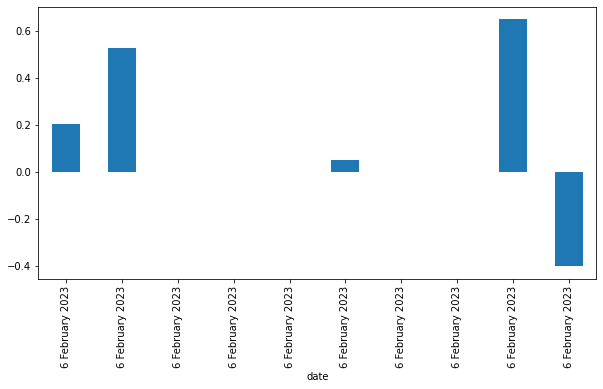

In [16]:
df['sentiment_score'].plot(kind='bar', figsize=(10,5))